# Methoden

#### Setup der Bibliotheken in Jupyter

*Die folgenden zwei Codezeilen sind spezielle Kommandos für Jupyter Notebooks, die benötigt werden um die Turtle Bibliothek verfügbar zu machen. Diese entsprechen nicht gültigem Java Code. Sie müssen auch nicht im Detail verstehen, was hier passiert.!!!!!!*

In [1]:
%mavenRepo bintray https://dl.bintray.com/egp/maven
%maven ch.unibas.informatik:jturtle:0.4

In [2]:
import ch.unibas.informatik.jturtle.Turtle;

## Parameterlose Methoden

Beim programmieren müssen wir häufig fast immer mehrere Befehle hintereinander ausführen um ein bestimmtes Verhalten zu erreichen. Als Beispiel nehmen wir wieder unsere Turtle Grafik. Wir erstellen uns zuerst ein Turtle:

In [26]:
Turtle turtle = new Turtle();
turtle.penDown();

Um ein rechtwinkliges Dreick zu zeichnen, brauchen wir nun folgende Befehle:

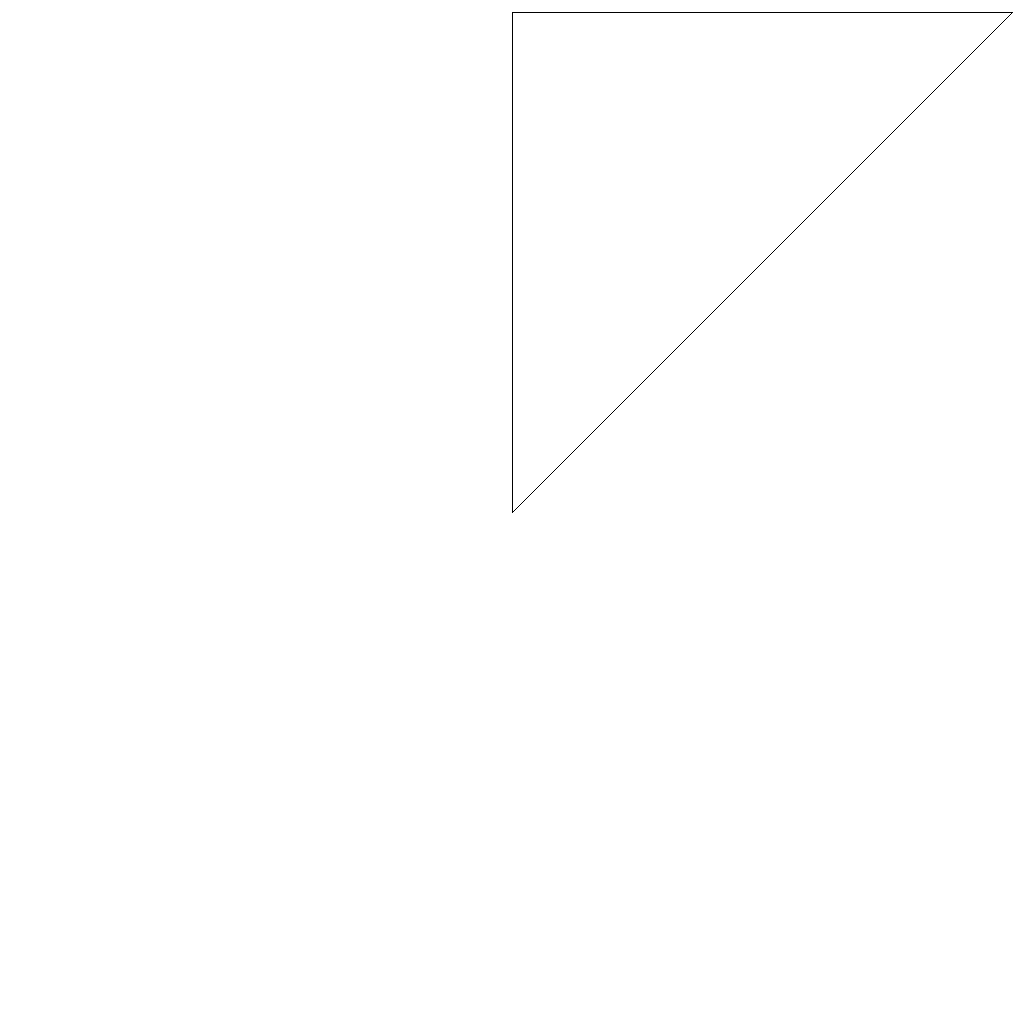

In [40]:
turtle.home();
turtle.clear();
int lengthLegs = 100;
turtle.forward(lengthLegs);
turtle.turnRight(90);
turtle.forward(lengthLegs);
turtle.turnRight(135);
turtle.forward(Math.sqrt(lengthLegs * lengthLegs + lengthLegs * lengthLegs)) ;
turtle.turnRight(90);
turtle.toImage();

Jedesmal wenn wir dieses Dreick wieder zeichnen wollen, müssen wir die Sequenz wiederholen. Dies ist nicht nur mühsam zum schreiben, sondern ist für den Leser des Programms auch schwierig zu verstehen. Besser ist es, wenn wir eine parameterlose Methode einführen:

In [31]:
void drawRightAngledTriangle() {
int lengthLegs = 100;
turtle.forward(lengthLegs);
turtle.turnRight(90);
turtle.forward(lengthLegs);
turtle.turnRight(135);
turtle.forward(Math.sqrt(lengthLegs * lengthLegs + lengthLegs * lengthLegs)) ;
turtle.turnRight(90);
}

Diese können wir nun beliebig oft aufrufen:

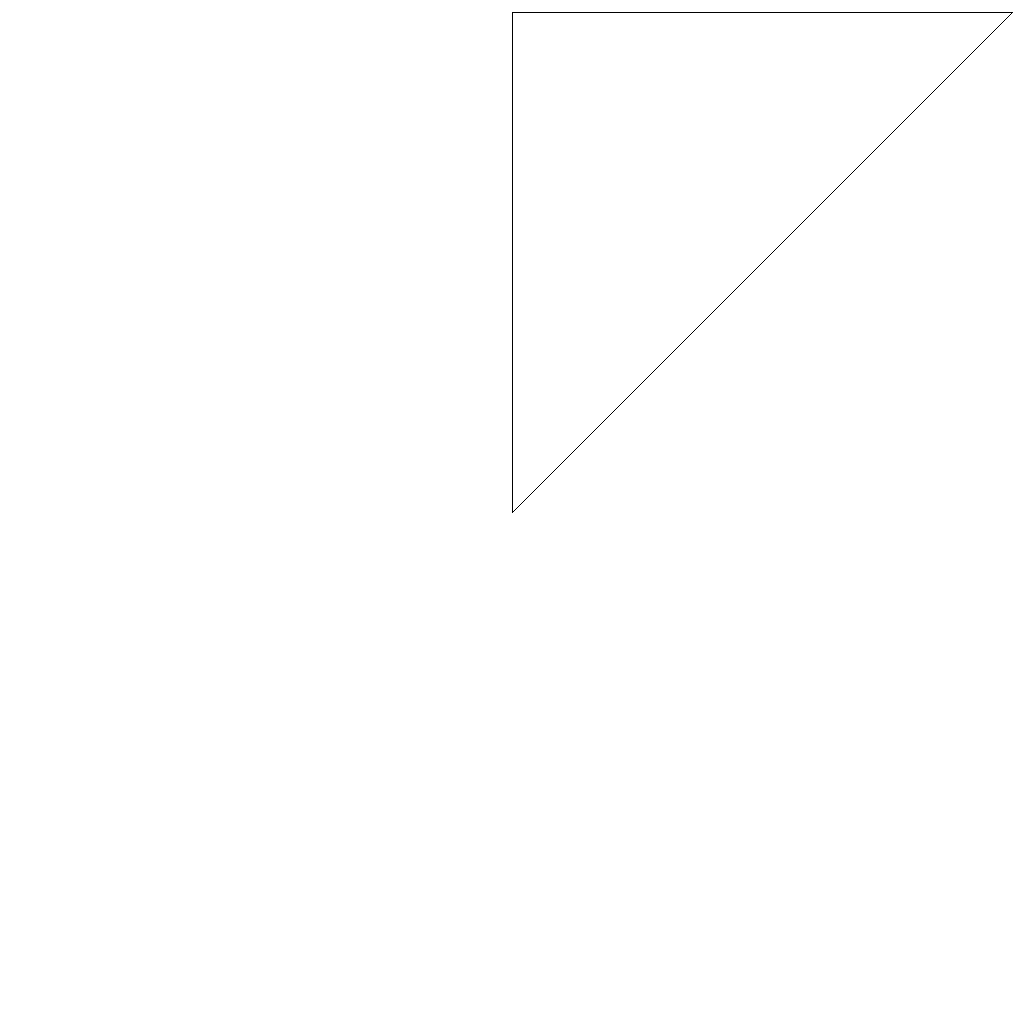

In [42]:
turtle.clear();
drawRightAngledTriangle();
turtle.toImage();

Das Programm ist jetzt kürzer und viel einfacher zu verstehen. Ausserdem können wir dieselben Befehle jetzt an beliebigen Stellen in unserem Programm ausführen. 

## Methoden mit Parametern

Unsere Methode ist jedoch noch nicht so nützlich wie sie sein könnte. Das Quadrat wird immer genau gleich gross und an die selbe Stelle im Bild gezeichnet. Die Method wird viel flexibler, wenn wir sie parametrisieren. In unserem Fall heisst das, dass wir zum Beispiel die Grösse des Quadrats (also die Seitelänge) als Parameter übergeben. 

In [43]:
  
void drawRightAngledTriangle(int lengthLegs) {
    turtle.home();
    turtle.forward(lengthLegs);
    turtle.turnRight(90);
    turtle.forward(lengthLegs);
    turtle.turnRight(135);
    turtle.forward(Math.sqrt(lengthLegs * lengthLegs + lengthLegs * lengthLegs)) ;
    turtle.turnRight(90);
    turtle.toImage();
}

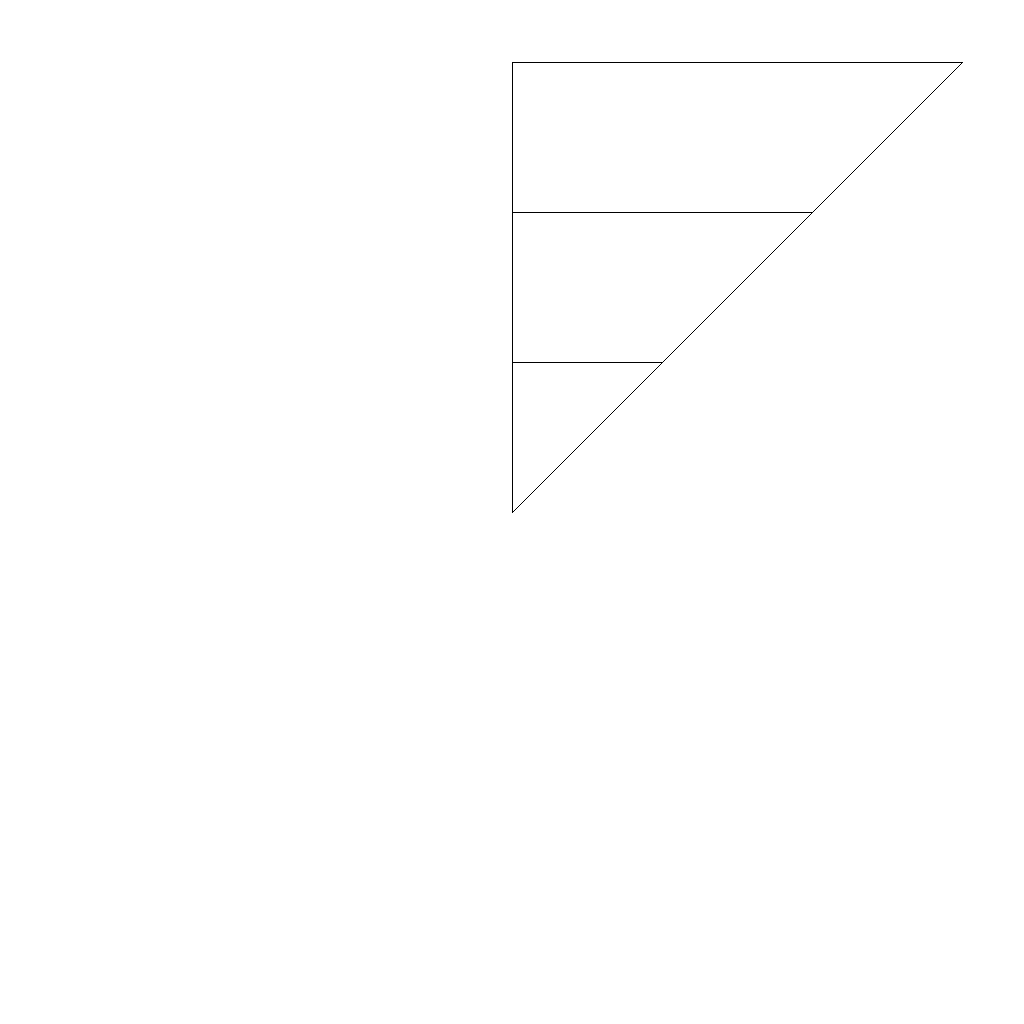

In [47]:
turtle.clear();
drawRightAngledTriangle(90);
drawRightAngledTriangle(60);
drawRightAngledTriangle(30);
turtle.toImage();

#### Miniübung

* Übergeben Sie auch die Startposition und passen Sie den Code entsprechend an.
* Können Sie den Code so erweitern, dass die Länge der Ankatheten unterschiedlich sein können?

# Funktionen (Methoden mit Rückgabewerte)

Methoden können auch Werte zurückgeben. Methoden, deren Zweck es einzig und alleine ist einen Wert berechnen und diesen dann zurückgeben nennen wir Funktionen. In unserem Beispiel wäre ein guter Kandidat für eine Funktion die Berechnung der Länge der Hypothenuse:

In [49]:
static double computeLengthHypothenuse(double leg1, double leg2) {
    return Math.sqrt(leg1 * leg1 + leg2 * leg2);
}

Damit können wir unsere Methode noch etwas eleganter schreiben:

In [60]:
static void drawRightAngledTriangle(int lengthLegs) {
    turtle.home();
    turtle.forward(lengthLegs);
    turtle.turnRight(90);
    turtle.forward(lengthLegs);
    turtle.turnRight(135);
    turtle.forward(computeLengthHypothenuse(lengthLegs, lengthLegs)) ;
    turtle.turnRight(90);
    turtle.toImage();
}

Wir hoffen ausserdem, dass diese Funktion auch in anderen Programmen nützlich sein, und wir somit diese Funktion nicht immer neu schreiben müssen. 

#### Miniübung
* Schreiben Sie eine Methode circle, die einen Kreis mit gegebenem Radius zeichnet.
* Zeichnen Sie dann eine Parameterlose Funktion, die die olympischen Ringe zeichnet. 

## Rekursion

Im obigen Beispiel haben wir bereits einen Fall gesehen, wo eine Methode eine andere Methode aufgerufen hat. Eine Methode kann aber nicht nur andere Methoden aufrufen, sondern kann auch sich selbst aufrufen. Dies nennt man dann Rekursion. Rekursion kennt man bereits aus der Mathematik. So ist zum Beispiel die Fibonacci Reihe Rekursiv definiert als:

$
f_0 = 0 \\
f_1 = 1 \\
f_n = f_{n -1} + f_{n - 2}
$

Wir können dies einfach mit Rekursiven Funktionen in Java umsetzen:


In [63]:
static int fibonacci(int n) {
    if (n == 0) {
        return 0;
    } else {
        if (n == 1) {
            return 1;
        } else {
            return (fibonacci(n -1) + fibonacci(n -2));
        }
    }
        
}

In [70]:
fibonacci(12);

144

#### Miniübung:

* Fügen Sie mit ```System.out.println``` Ausgaben hinzu um zu verstehen was diese Methode genau mcht
* Geben Sie die ersten 20 Elemente der Fibonaccireihe us. 

Rekursion lässt sich auch bestens mit Turtlegrafik veranschaulichen. Ein berühmtes Beispiel einer Rekursiven Funktion ist das Sierpinski Dreieck. Dabei werden in jedem Dreieck wieder 3 kleinere Dreiecke gezeichnet. Wir brechen ab, wenn wir eine bestimmte Rekursionstiefe erreicht haben. 

Beachten Sie dass wir hier zusätzlich auch das turtle als Parameter mitübergeben müssen. Wir werden später sehen, wie wir mit solchen Komplexeren Argumenten arbeiten. Im Moment reicht für Sie zu wissen, dass das turtle durch den Parameter ```turtle``` welcher vom Typ ```Turtle``` ist übergeben wird. 

In [85]:
static void drawSierpinski(Turtle turtle, double length, int depth) {
    if (depth==0){
        for (int i = 0; i < 3; i++) {
            turtle.forward(length);
            turtle.turnLeft(120);
        }
    }
    else {
        drawSierpinski(turtle, length/2.0 , depth-1);
        turtle.forward(length/2);
        drawSierpinski(turtle, length/2.0,depth-1);
        t.backward(length/2);
        turtle.turnLeft(60);
        t.forward(length/2);
        t.turnRight(60);
        drawSierpinski(turtle, length/2.0,depth-1);
        turtle.turnLeft(60);
        turtle.backward(length/2);
        turtle.turnRight(60);
    }
}

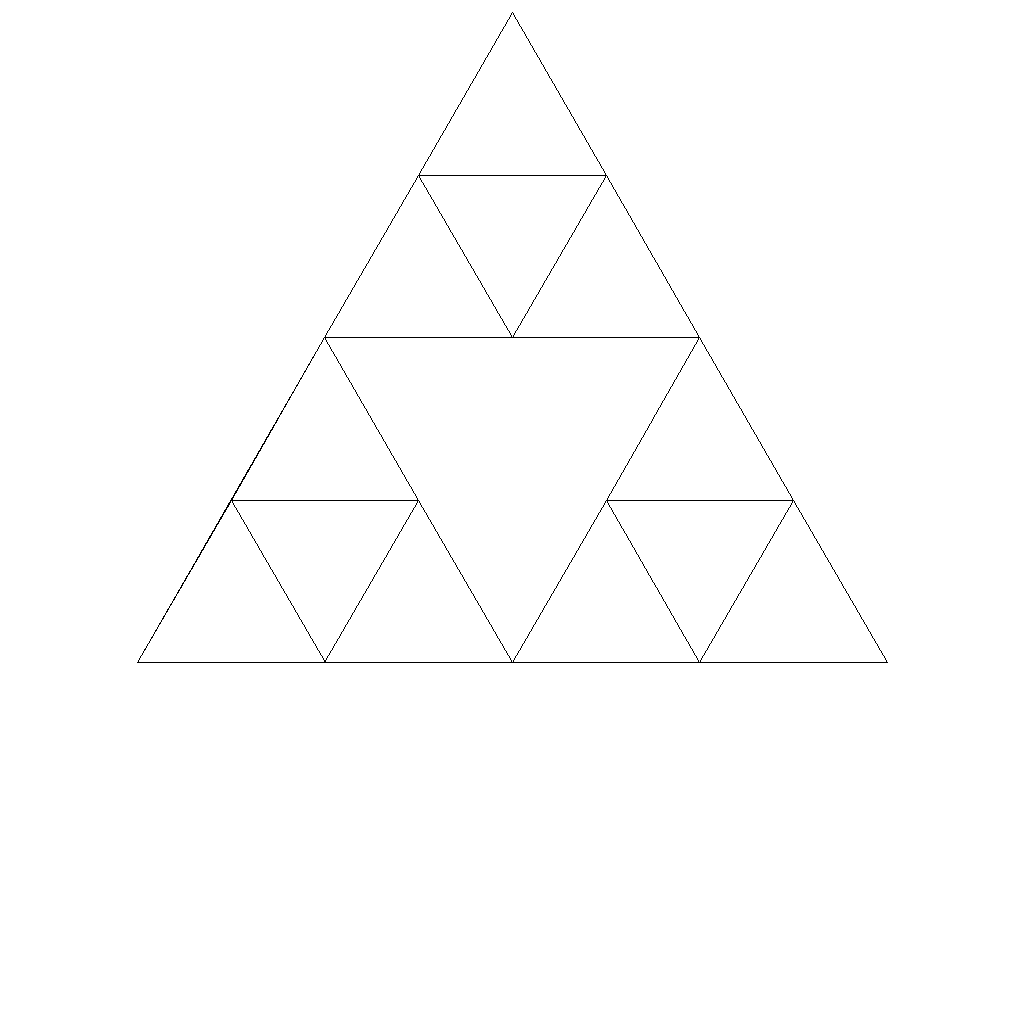

In [93]:
Turtle t = new Turtle();
t.home();
t.backward(30);
t.turnRight(90);
t.backward(75);
t.penDown();    
drawSierpinski(t, 150, 2);
t.toImage();

#### Miniübung:

* Schauen Sie wie die Zeichnung aufgebaut ist indem Sie die Methode für depth 0, 1, 2, ... ausführen.